# name: Ansh Shukla
# MAJOR PROJECT
# topic: employee promotion analysis

## installing and importing necessary modules 

In [1]:
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install -U scikit-learn
!pip install plotly
!pip install missingno
!pip install imblearn

In [2]:
# lets import the Library
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

import numpy as np
import plotly.express as px
# for data visualizations
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

# for missing values
import missingno as mno


# for date time manipulation
import datetime
# for interactivity
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

In [3]:
# lets read the dfset
datatrain = pd.read_csv('train.csv')

In [4]:
# lets check the head of the dataset
datatrain.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


# cleaning test dataset and making target dataframe

In [5]:
traindf=datatrain.drop("is_promoted", axis=1)
traindfclean=traindf.drop(["employee_id","department","region","recruitment_channel"],axis=1)
target=datatrain["is_promoted"]
targetdf=pd.DataFrame(data=datatrain["is_promoted"])

In [6]:
traindf

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45


In [7]:
traindf.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [8]:
traindfclean

,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Master's & above,f,1,35,5.0,8,1,0,49
1,Bachelor's,m,1,30,5.0,4,0,0,60
2,Bachelor's,m,1,34,3.0,7,0,0,50
3,Bachelor's,m,2,39,1.0,10,0,0,50
4,Bachelor's,m,1,45,3.0,2,0,0,73
...,...,...,...,...,...,...,...,...,...
54803,Bachelor's,m,1,48,3.0,17,0,0,78
54804,Master's & above,f,1,37,2.0,6,0,0,56
54805,Bachelor's,m,1,27,5.0,3,1,0,79
54806,NaN,m,1,29,1.0,2,0,0,45


In [9]:
traindfclean.isna().sum()

education               2409
gender                     0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [10]:
traindfclean.isnull().sum()

education               2409
gender                     0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [11]:
#since the value are missing from a catagorical column, we will use most appeared values to fill missing values
traindfclean = traindfclean.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [12]:
traindfclean.isna().sum()

education               0
gender                  0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [13]:
traindfclean

,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Master's & above,f,1,35,5.0,8,1,0,49
1,Bachelor's,m,1,30,5.0,4,0,0,60
2,Bachelor's,m,1,34,3.0,7,0,0,50
3,Bachelor's,m,2,39,1.0,10,0,0,50
4,Bachelor's,m,1,45,3.0,2,0,0,73
...,...,...,...,...,...,...,...,...,...
54803,Bachelor's,m,1,48,3.0,17,0,0,78
54804,Master's & above,f,1,37,2.0,6,0,0,56
54805,Bachelor's,m,1,27,5.0,3,1,0,79
54806,Bachelor's,m,1,29,1.0,2,0,0,45


In [14]:
target

0        0
1        0
2        0
3        0
4        0
        ..
54803    0
54804    0
54805    0
54806    0
54807    0
Name: is_promoted, Length: 54808, dtype: int64

In [15]:
targetdf

,is_promoted
0,0
1,0
2,0
3,0
4,0
...,...
54803,0
54804,0
54805,0
54806,0


In [16]:
le_education = LabelEncoder()
le_gender = LabelEncoder()
#using label encoding to get the catagorical values into numerical values

In [17]:
traindfclean['education_n'] = le_education.fit_transform(traindfclean['education'])
traindfclean['gender_n'] = le_gender.fit_transform(traindfclean['gender'])

In [18]:
traindfclean=traindfclean.drop(["education","gender"],axis=1)

In [19]:
traindfclean

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,education_n,gender_n
0,1,35,5.0,8,1,0,49,2,0
1,1,30,5.0,4,0,0,60,0,1
2,1,34,3.0,7,0,0,50,0,1
3,2,39,1.0,10,0,0,50,0,1
4,1,45,3.0,2,0,0,73,0,1
...,...,...,...,...,...,...,...,...,...
54803,1,48,3.0,17,0,0,78,0,1
54804,1,37,2.0,6,0,0,56,2,0
54805,1,27,5.0,3,1,0,79,0,1
54806,1,29,1.0,2,0,0,45,0,1


In [20]:
traindfclean.isnull().sum()

no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
education_n             0
gender_n                0
dtype: int64

In [21]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [22]:
model.fit(traindfclean,target)

DecisionTreeClassifier()

In [23]:
from sklearn import tree
print(tree.export_text(model))

|--- feature_6 <= 90.50
|   |--- feature_4 <= 0.50
|   |   |--- feature_5 <= 0.50
|   |   |   |--- feature_2 <= 4.50
|   |   |   |   |--- feature_6 <= 59.50
|   |   |   |   |   |--- feature_6 <= 57.50
|   |   |   |   |   |   |--- feature_6 <= 54.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_6 >  54.50
|   |   |   |   |   |   |   |--- feature_1 <= 33.50
|   |   |   |   |   |   |   |   |--- feature_3 <= 8.50
|   |   |   |   |   |   |   |   |   |--- feature_8 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_8 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_6 <= 56.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 9
|   |   |   |   |   |   |   |   |   |   |--- feature_6 >  56.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 10
|   |   |   |   |   |   |   |   |--- feature_3 >  8.50
|   |   |   |   |   |   |   |   |   |--- fea

In [24]:
model.score(traindfclean, targetdf)

0.9867172675521821

thus we find the score of the model to find the targetdf using the training dataframe as input

# splitting train dataset into training and testing ds to assess the model 

In [25]:
X = traindfclean
y = targetdf
X.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,education_n,gender_n
0,1,35,5.0,8,1,0,49,2,0
1,1,30,5.0,4,0,0,60,0,1
2,1,34,3.0,7,0,0,50,0,1
3,2,39,1.0,10,0,0,50,0,1
4,1,45,3.0,2,0,0,73,0,1


In [26]:
y.head()

,is_promoted
0,0
1,0
2,0
3,0
4,0


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
dtree = DecisionTreeClassifier()

In [30]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [31]:
from sklearn import tree
print(tree.export_text(dtree))

|--- feature_6 <= 90.50
|   |--- feature_4 <= 0.50
|   |   |--- feature_5 <= 0.50
|   |   |   |--- feature_2 <= 4.50
|   |   |   |   |--- feature_6 <= 60.50
|   |   |   |   |   |--- feature_6 <= 57.50
|   |   |   |   |   |   |--- feature_6 <= 54.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_6 >  54.50
|   |   |   |   |   |   |   |--- feature_1 <= 26.50
|   |   |   |   |   |   |   |   |--- feature_6 <= 56.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_6 >  56.50
|   |   |   |   |   |   |   |   |   |--- feature_3 <= 3.50
|   |   |   |   |   |   |   |   |   |   |--- feature_3 <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |   |--- feature_3 >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_3 >  3.50
|   |   |   |   |   |   |   |   |   |   |--- feature_2 <= 3.50
|   |

In [32]:
predictions = dtree.predict(X_test)

In [33]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     15012
           1       0.28      0.29      0.29      1431

    accuracy                           0.87     16443
   macro avg       0.61      0.61      0.61     16443
weighted avg       0.88      0.87      0.87     16443



In [34]:
print(confusion_matrix(y_test,predictions))

[[13960  1052]
 [ 1018   413]]


In [35]:
target_names = traindf['education'].unique().tolist()
Feature_names=["no_of_trainings","age","previous_year_rating","length_of_service","KPIs_met >80%","awards_won?","avg_training_score","education_n","gender_n"]

thus we have verified the working of our model on test dataset(by splitting it into x and y train and test) using confusion matrix 

In [36]:
#tree.plot_tree(model, feature_names = Feature_names, class_names = target_names, rounded=True, filled = True);
# tree plot to visualise the decision tree. 

# pre processing test dataset just like we did with training dataset

In [37]:
#reading test dataset
datatest=pd.read_csv("test.csv")

In [38]:
datatest.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [39]:
testdf=pd.DataFrame(data=datatest)
testdfclean=testdf.drop(["employee_id","department","region","recruitment_channel"],axis=1)
#removing unnecessary columns "employee_id","department","region","recruitment_channel"

In [40]:
testdfclean

,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Bachelor's,m,1,24,NaN,1,1,0,77
1,Bachelor's,f,1,31,3.0,5,0,0,51
2,Bachelor's,m,1,31,1.0,4,0,0,47
3,Bachelor's,f,3,31,2.0,9,0,0,65
4,Bachelor's,m,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...
23485,Below Secondary,m,1,24,3.0,1,0,0,61
23486,Bachelor's,m,1,31,3.0,7,0,0,74
23487,Bachelor's,f,1,26,4.0,4,0,0,50
23488,Bachelor's,m,3,27,NaN,1,0,0,70


In [41]:
traindfclean.isnull().sum()

no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
education_n             0
gender_n                0
dtype: int64

In [42]:
#for catagorical data filling
testdfclean = testdfclean.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [43]:
le_education = LabelEncoder()
le_gender = LabelEncoder()
testdfclean['education_n'] = le_education.fit_transform(testdfclean['education'])
testdfclean['gender_n'] = le_gender.fit_transform(testdfclean['gender'])
testdfclean=testdfclean.drop(["education","gender"],axis=1)

In [44]:
testdfclean

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,education_n,gender_n
0,1,24,3.0,1,1,0,77,0,1
1,1,31,3.0,5,0,0,51,0,0
2,1,31,1.0,4,0,0,47,0,1
3,3,31,2.0,9,0,0,65,0,0
4,1,30,4.0,7,0,0,61,0,1
...,...,...,...,...,...,...,...,...,...
23485,1,24,3.0,1,0,0,61,1,1
23486,1,31,3.0,7,0,0,74,0,1
23487,1,26,4.0,4,0,0,50,0,0
23488,3,27,3.0,1,0,0,70,0,1


In [45]:
testdfclean.isna().sum()

no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
education_n             0
gender_n                0
dtype: int64

In [46]:
testdfclean.isnull().sum()

no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
education_n             0
gender_n                0
dtype: int64

In [47]:
testdfprediction=pd.DataFrame(data=model.predict(testdfclean))

In [48]:
testdfprediction

,0
0,0
1,0
2,0
3,0
4,0
...,...
23485,0
23486,0
23487,0
23488,0


In [49]:
testdfprediction.rename(columns = {0:'is_promoted'}, inplace = True)

In [50]:
testdfprediction[testdfprediction.is_promoted==1]

,is_promoted
5,1
25,1
26,1
36,1
40,1
...,...
23408,1
23425,1
23445,1
23460,1


above shown are the employees which are promoted

In [51]:
testdfprediction[testdfprediction.is_promoted==0]

,is_promoted
0,0
1,0
2,0
3,0
4,0
...,...
23485,0
23486,0
23487,0
23488,0


 above shown are the employees which are not promoted

In [52]:
testdfprediction.to_csv('predictedvalue.csv', encoding='utf-8')

exporting the predicted values of promotion status into csv

# EDA (univariate, bivariate and multivariate analysis)

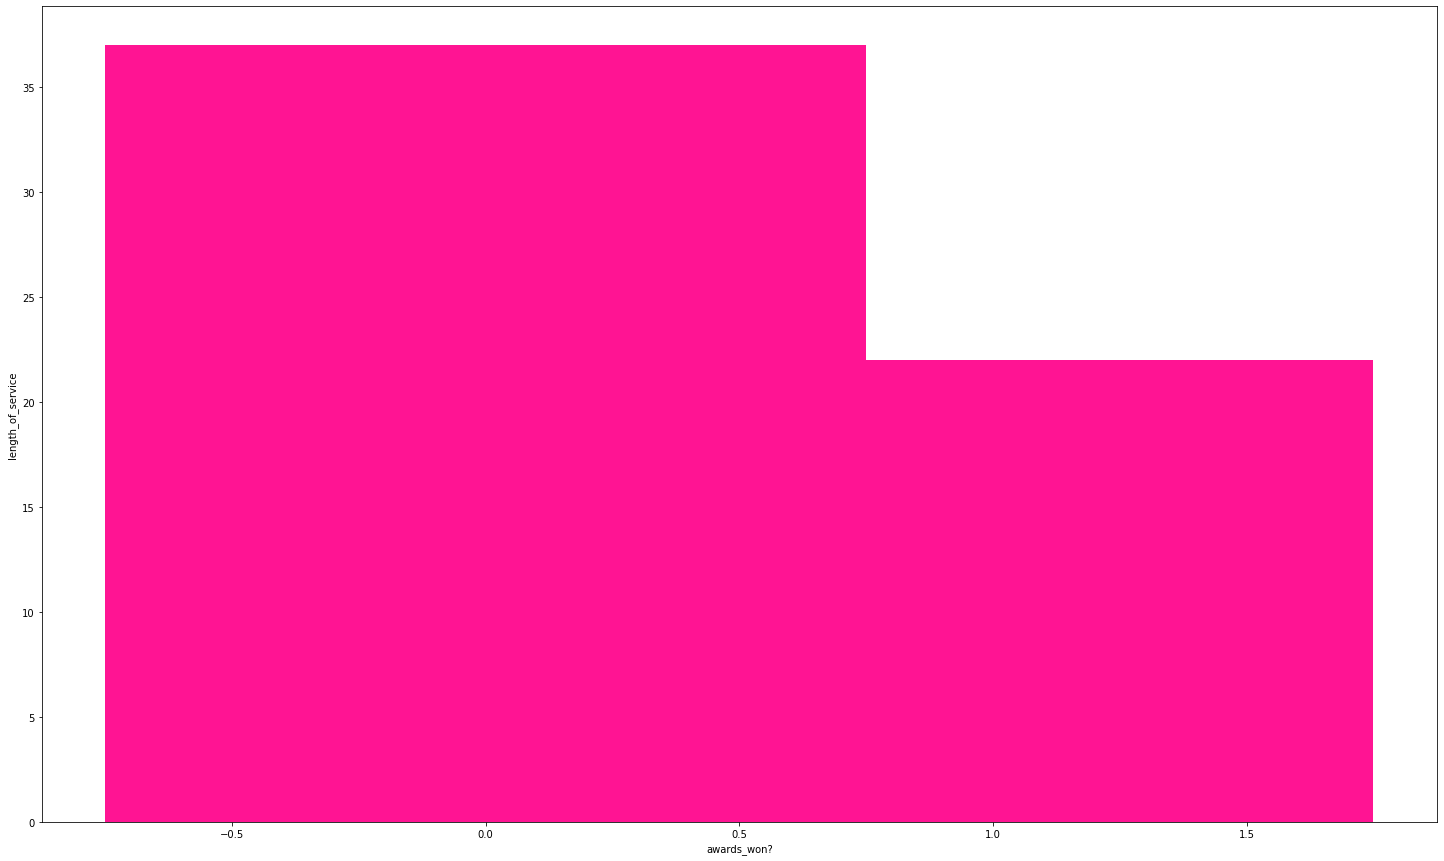

In [53]:
plt.figure(figsize=(25,15))
plt.bar(x = traindfclean['awards_won?'], height = traindfclean['length_of_service'], width = 1.5, color = 'deeppink')
plt.title("", fontsize = 10)
plt.xlabel('awards_won?')
plt.ylabel("length_of_service")
plt.show() 

C:\Users\asash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


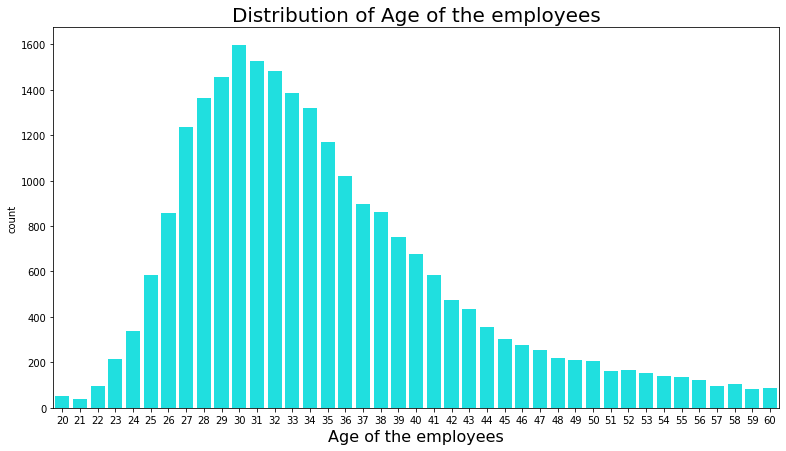

In [54]:
agedis=testdfclean["age"]
plt.figure(figsize=[13,7])
ageplot=sns.countplot(agedis,color="#00ffff")
ageplot.set_xlabel(xlabel = 'Age of the employees', fontsize = 16)
ageplot.set_title(label = 'Distribution of Age of the employees', fontsize = 20)
plt.show()

C:\Users\asash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


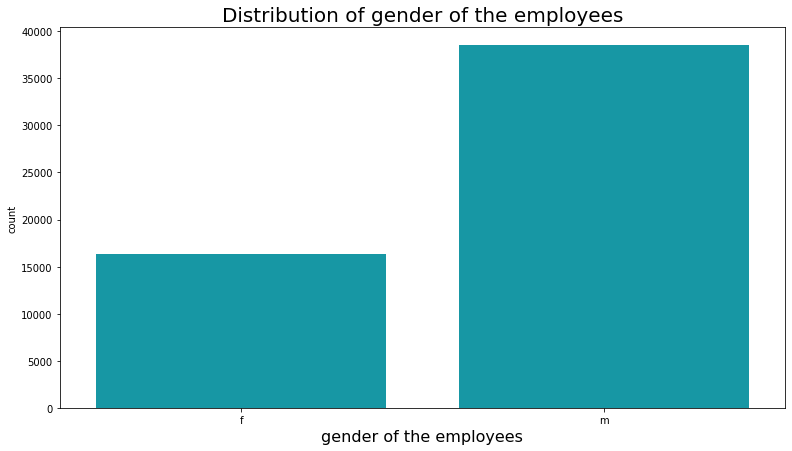

In [55]:
gendis=traindf["gender"]
plt.figure(figsize=[13,7])
ageplot=sns.countplot(gendis,color="#00aabb")
ageplot.set_xlabel(xlabel = 'gender of the employees', fontsize = 16)
ageplot.set_title(label = 'Distribution of gender of the employees', fontsize = 20)
plt.show()

C:\Users\asash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


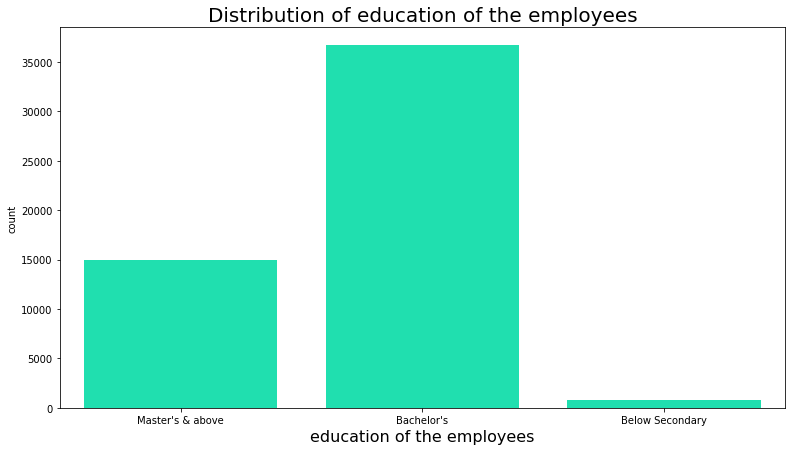

In [56]:
edudis=traindf["education"]
plt.figure(figsize=[13,7])
ageplot=sns.countplot(edudis,color="#00ffbf")
ageplot.set_xlabel(xlabel = 'education of the employees', fontsize = 16)
ageplot.set_title(label = 'Distribution of education of the employees', fontsize = 20)
plt.show()

C:\Users\asash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


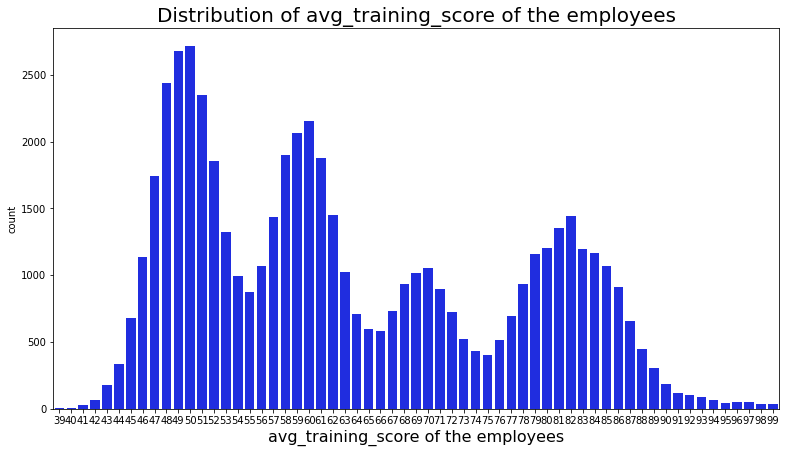

In [57]:
gendis=traindf["avg_training_score"]
plt.figure(figsize=[13,7])
ageplot=sns.countplot(gendis,color="#0012ff")
ageplot.set_xlabel(xlabel = 'avg_training_score of the employees', fontsize = 16)
ageplot.set_title(label = 'Distribution of avg_training_score of the employees', fontsize = 20)
plt.show()

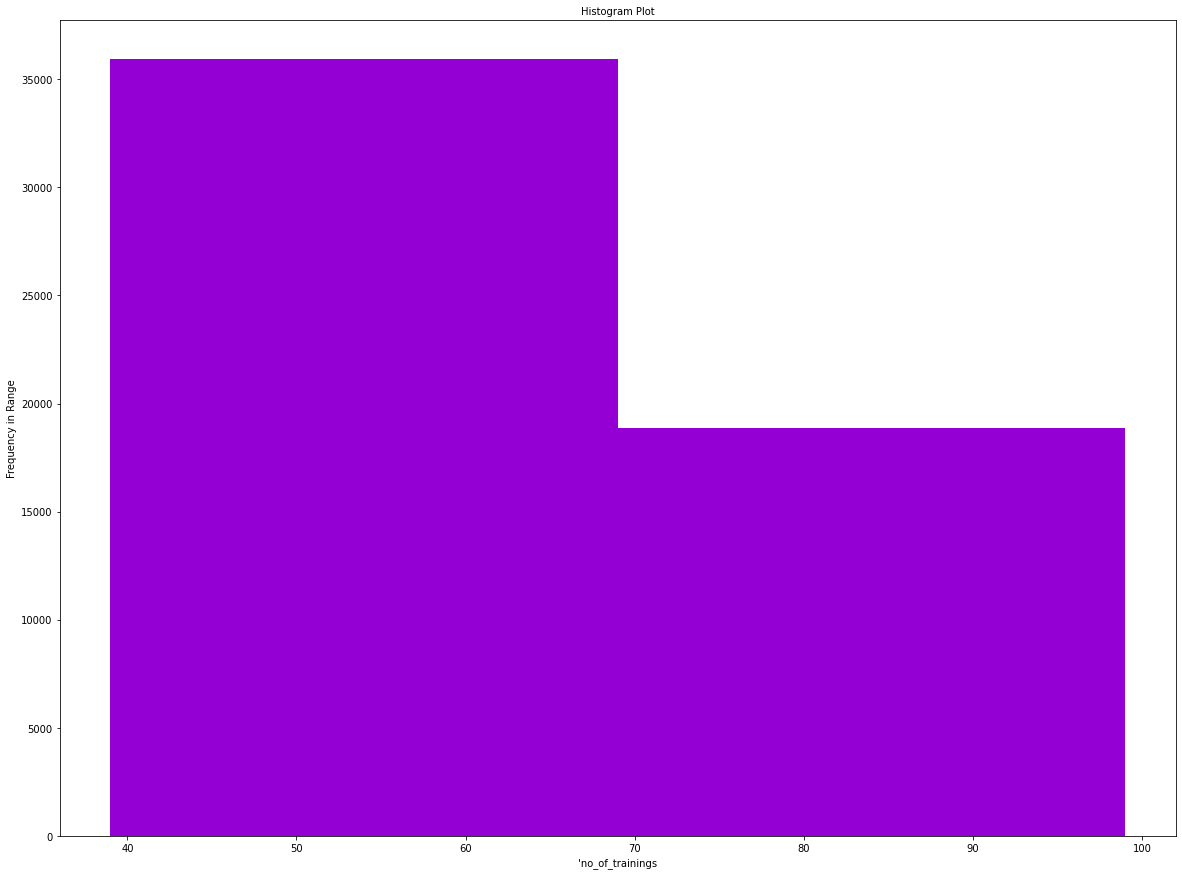

In [58]:
plt.figure(figsize=(20,15))
plt.hist(traindfclean['avg_training_score'],  bins = 2, color = 'darkviolet')
plt.title("Histogram Plot", fontsize = 10)
plt.xlabel("'no_of_trainings")
plt.ylabel("Frequency in Range")
plt.show() 

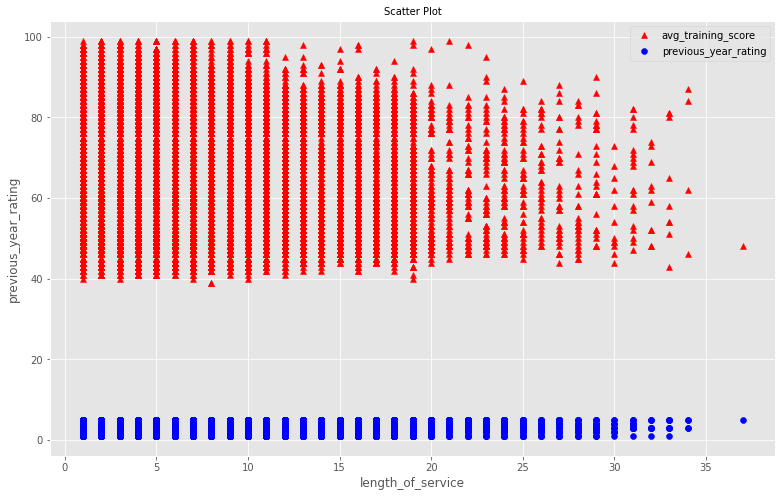

In [59]:
plt.style.use('ggplot')
plt.figure(figsize=(13,8))
plt.scatter(x = traindfclean['length_of_service'], y = traindfclean['avg_training_score'], c = 'r', marker='^', label = 'avg_training_score')
plt.scatter(x = traindfclean['length_of_service'], y = traindfclean['previous_year_rating'], c = 'b', marker = 'o', label = 'previous_year_rating')
plt.title("Scatter Plot", fontsize = 10)
plt.xlabel("length_of_service")
plt.ylabel("previous_year_rating")
plt.legend()
plt.show() 

## Effect of age on promotion

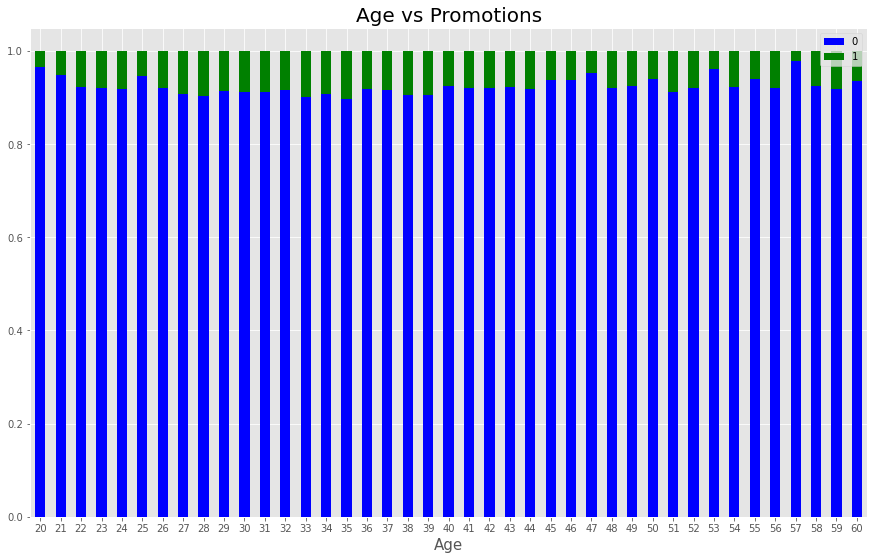

In [60]:
promotion = pd.crosstab(datatrain['age'], datatrain['is_promoted'])
promotion.div(promotion.sum(1).astype('float'), axis=0).plot(kind='bar', stacked=True, figsize=(15, 9), color=['blue', 'green'])

plt.title('Age vs Promotions', fontsize=20)
plt.xticks(rotation=360)
plt.xlabel('Age', fontsize=15)
plt.legend()
plt.show()

So, no. We can see from the above that the company is promoting employees irrespective of their age whether they are a fresher or a senior employee, it does not matter.

##  Probability to get Promoted, If an employeed has won an award

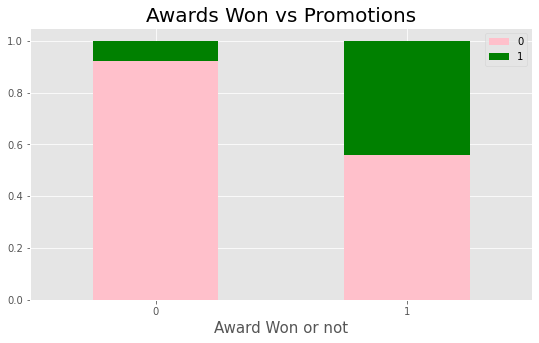

In [61]:
promotion = pd.crosstab(datatrain['awards_won?'], datatrain['is_promoted'])
promotion.div(promotion.sum(1).astype('float'), axis=0).plot(kind='bar', stacked=True, figsize=(9, 5), color=['pink', 'green'])

plt.title('Awards Won vs Promotions', fontsize=20)
plt.xticks(rotation=360)
plt.xlabel('Award Won or not', fontsize=15)
plt.legend()
plt.show()


So yes, there is a high chance of getting promoted if an employee has won an award.

## Average Training Score of those Employees who got Promotion

In [62]:
data1 = datatrain[datatrain.is_promoted != 0]
#data1 is the data of promoted employees
data1["avg_training_score"].mean()

71.32519280205655

The Average Training Score of those Employees who got Promotion is 71.32519280205655

## Impact of Gender in Promotions

In [63]:
gender_promotion_df = datatrain.groupby(['gender', 'is_promoted']).agg({'employee_id': 'sum'})
gender_promotion_df.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

employee_id
gender is_promoted             
f      0              91.079977
       1               8.920023
m      0              91.626468
       1               8.373532

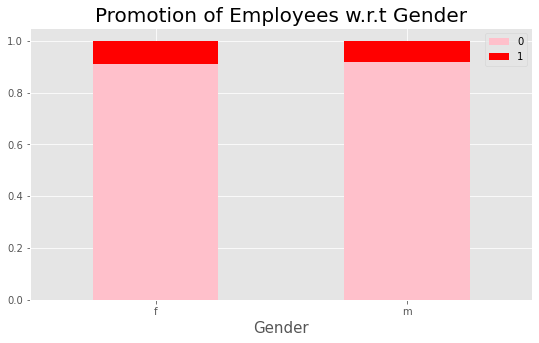

In [64]:
promotion = pd.crosstab(datatrain['gender'], datatrain['is_promoted'])
promotion.div(promotion.sum(1).astype('float'), axis=0).plot(kind='bar', stacked=True, figsize=(9, 5), color=['pink', 'red'])

plt.title('Promotion of Employees w.r.t Gender', fontsize=20)
plt.xticks(rotation=360)
plt.xlabel('Gender', fontsize=15)
plt.legend()
plt.show()

So, we can see from the above table and visuailization that female employees are getting promoted as equally as male employees infact a little bit higher than male employees. So gender has no impact in promotion.

## Probability of Freshers getting Promoted

In [65]:
data2 = data1[data1.length_of_service == 1]
total_promotion = len(data1.index)
fresher_promotion = len(data2.index)
prob_of_prom = fresher_promotion/total_promotion
prob_of_prom

0.08076263924592973

Probability of Freshers getting Promoted is 0.08076263924592973

In [66]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [67]:
train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [68]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [69]:
# Total missing values in 'education' column

train_data.education.isnull().sum()

2409

In [70]:
def fill_missing(df, column, value):
    df_copy = df.copy()
    df_copy[column].fillna(value=value,inplace=True)
    return df_copy

train_data = fill_missing(train_data, "education", "others")
test_data = fill_missing(test_data, "education", "others")

train_data = fill_missing(train_data, "previous_year_rating", 0.0)
test_data = fill_missing(test_data, "previous_year_rating", 0.0)

Converting 'object' columns into categorical

In [71]:
train_data.department.value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [72]:
train_data.education.value_counts()

Bachelor's          36669
Master's & above    14925
others               2409
Below Secondary       805
Name: education, dtype: int64

In [73]:
train_data.gender.value_counts()

m    38496
f    16312
Name: gender, dtype: int64

In [74]:
train_data.recruitment_channel.value_counts()


other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

In [75]:
# Object columns into categorical datatype

def convert_to_category(df, column_list):
    df_copy = df.copy()
    df_copy[column_list] = df_copy[column_list].apply(lambda x: x.astype('category'))
    return df_copy

train_data = convert_to_category(train_data, ['department','region','education','gender','recruitment_channel'])
test_data = convert_to_category(test_data, ['department','region','education','gender','recruitment_channel'])

Checking Duplicate Records

In [76]:
# duplicate employee ID
# Could also use df.duplicated().sum()

condition = bool(train_data.duplicated(subset = 'employee_id').any())

if condition:
    print('There are duplicate employee IDs')
else:
    print('No duplicate employee IDs')

No duplicate employee IDs


# Exploratory Data Analysis

In [77]:
# Check class balance

train_data.is_promoted.value_counts(normalize=True)

0    0.91483
1    0.08517
Name: is_promoted, dtype: float64

The majority classes are 0s with rare 1s, considering the classes in this dataset are very imbalanced. Need to use undersampling or oversampling techniques to make training data balanced

In [78]:
train_data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.078748,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.496458,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,0.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,2.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


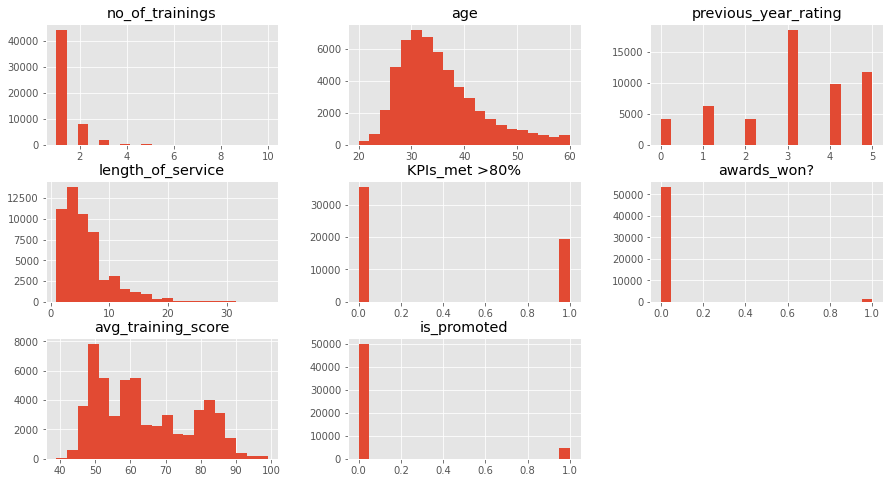

In [79]:
# Removing column 'employee_id' from the dataframe

train_data.drop(columns='employee_id',inplace=True)  
test_data.drop(columns='employee_id',inplace=True)  

# Ploting histograms of all numerical columns

train_data.hist(bins=20, figsize=(15,8))
plt.show()

In [80]:
# Define a function to plot stacked bar chart since there will be multiple stacked bars charts to plot

def create_stacked_bar(column_name):

    promo_by_group = pd.crosstab(index=train_data['is_promoted'],columns = train_data[column_name], normalize = 'columns')
    promo_by_group = promo_by_group.apply(lambda x: round(x,2))
    
    labels = promo_by_group.columns
    list1 = promo_by_group.iloc[0].to_list()
    list2 = promo_by_group.iloc[1].to_list()
    
    list1_name = "Not promoted"
    list2_name = "Promoted"
    title = f"Promotion by {column_name}"
    xlabel = column_name
    ylabel = "Promotion percentage"
    
    fig, ax = plt.subplots(figsize=(10, 5))
    bar_width = 0.5
    
    ax1 = ax.bar(labels,list1, bar_width, label = list1_name)
    ax2 = ax.bar(labels,list2, bar_width, bottom = list1, label = list2_name)

    ax.set_title(title, fontweight = "bold")
    ax.set_xlabel(xlabel, fontweight = "bold")
    ax.set_ylabel(ylabel, fontweight = "bold")
    ax.legend(loc="best")
    
    plt.xticks(list(range(len(labels))), labels,rotation=90)
    plt.yticks(fontsize=9)

    for r1, r2 in zip(ax1, ax2):
        h1 = r1.get_height()
        h2 = r2.get_height()
        plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., f"{h1:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")
        plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., f"{h2:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")

    plt.show()

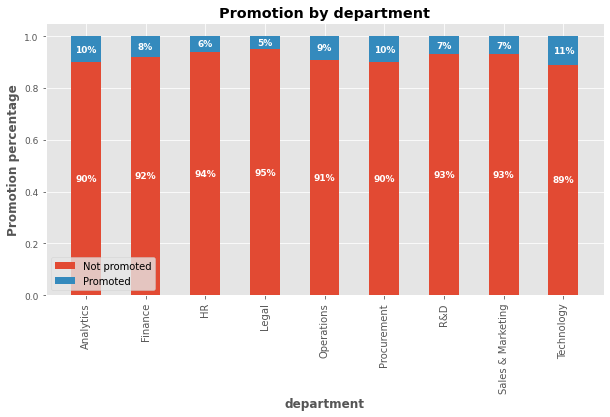

In [81]:
create_stacked_bar('department')

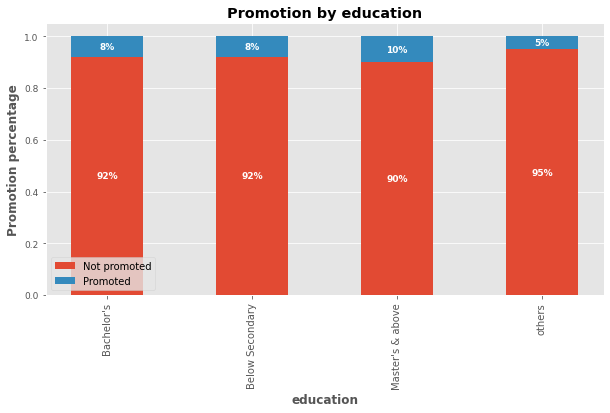

In [82]:
create_stacked_bar('education')

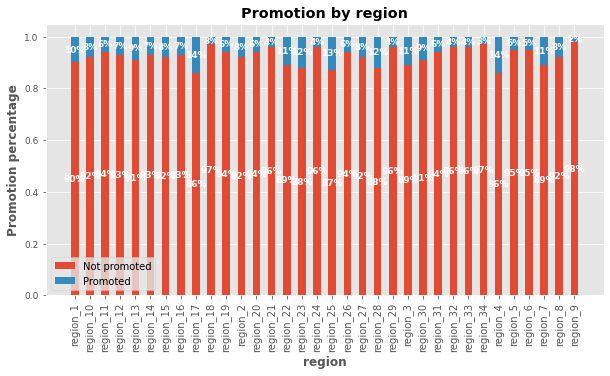

In [83]:
create_stacked_bar('region')

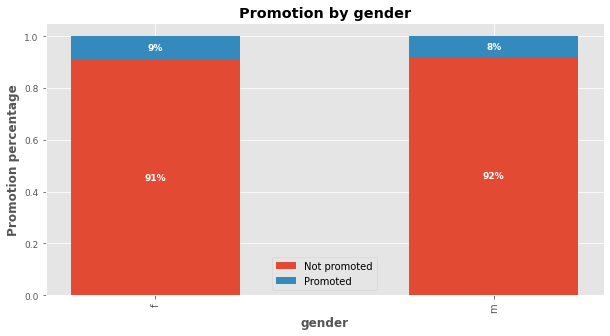

In [84]:
create_stacked_bar('gender')

# Modeling Preparation
###  1.Feature Engineering

In [85]:
# Bin ‘AGE’ data to groups
# Transforming both training data and test data

def convert_age_to_group(df):
    df_copy = df.copy()
    bins = range(20,61,5)    # every 5 years as a bin
    labels = list(range(len(bins)-1))
    df_copy['age_group'] = pd.cut(df_copy['age'],bins=bins, labels=labels, right=True, include_lowest=True)
    df_copy.drop(columns=["age"], inplace=True)
    return df_copy

train_data = convert_age_to_group(train_data)
test_data = convert_age_to_group(test_data)

In [86]:
# Using LabelEncoder to convert categorical features into numerical array

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
def convert_to_numerical(df_train, df_test):
    df_train_copy = df_train.copy()
    df_test_copy = df_test.copy()
    
    for i in ["department", "region", "education", "gender", "recruitment_channel", "age_group"]:
        le = LabelEncoder()
        le.fit(df_train_copy.loc[:, i])
        df_train_copy.loc[:, i] = le.transform(df_train_copy.loc[:, i])
        df_test_copy.loc[:, i] = le.transform(df_test_copy.loc[:, i])
    
    return df_train_copy, df_test_copy

train_data, test_data = convert_to_numerical(train_data, test_data)

### 2. Feature Selection

In [87]:
# Defining predictor variables and target variable

X = train_data.drop(columns=['is_promoted'])
y = train_data['is_promoted']

X_test = test_data.copy()

# Saving all feature names as list
feature_cols = X.columns.tolist() 

# Extracting numerical columns and save as a list for rescaling
num_cols = ['no_of_trainings', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score']

### 3. Split Training and Test Data

In [88]:
# Defining function to split data with and without SMOTE 

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

def data_split(X, y, imbalance = False):
    X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.3,shuffle=True, stratify=y, random_state=42)
    
    if imbalance:
        # use SMOTE to over sample data
        sm = SMOTE(random_state = 42)
        X_train, y_train = sm.fit_sample(X_train, y_train.ravel())
    
    return X_train, X_validation, y_train, y_validation

### 4. Rescale Features


In [89]:
# Defining function to rescale training data using StandardScaler

from sklearn.preprocessing import StandardScaler

def standard_scaler(X_train, X_validation, X_test,  numerical_cols):
    
    # Make copies of dataset
    X_train_std = X_train.copy()
    X_validation_std = X_validation.copy()
    X_test_std = X_test.copy()
    
    # Applying standardization on numerical features only
    for i in numerical_cols:
        scl = StandardScaler().fit(X_train_std[[i]])     # fit on training data columns
        X_train_std[i] = scl.transform(X_train_std[[i]]) # transforming the training data columns
        X_validation_std[i] = scl.transform(X_validation_std[[i]])   # transforming the validation data columns
        X_test_std[i] = scl.transform(X_test_std[[i]])   # transforming the test data columns
    return X_train_std, X_validation_std, X_test_std


### Variation of promotion percentage with recruitment channel that they have come from


In [90]:
pd.crosstab(train_data.recruitment_channel,train_data.is_promoted,normalize='index')

is_promoted,0,1
recruitment_channel,,
0,0.916048,0.083952
1,0.879159,0.120841
2,0.914987,0.085013


### Difference in the percentage of promoted employees with respect to previous year ratings

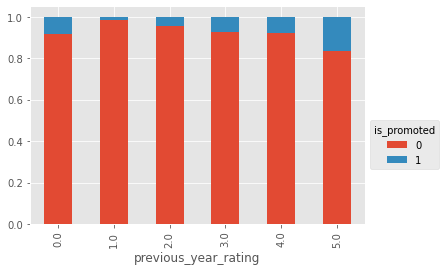

In [91]:
rating = pd.crosstab(train_data.previous_year_rating,train_data.is_promoted,normalize='index')
rating.plot.bar(stacked=True)
plt.legend(title='is_promoted',loc='upper left',bbox_to_anchor=(1, 0.5))

According to the results of grid search, 500 is the optimal number of estimators.

### Percentage of people who got promoted from each department

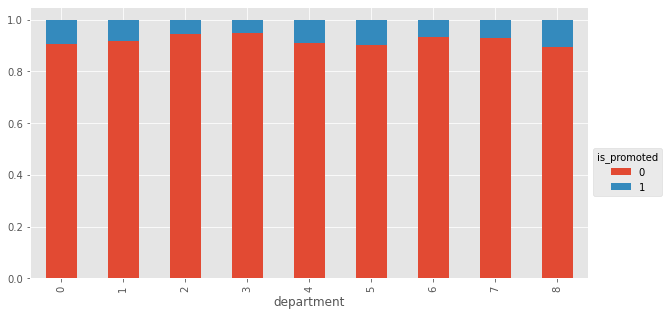

In [92]:
plt.rcParams['figure.figsize'] = [10, 5]
ct = pd.crosstab(train_data.department,train_data.is_promoted,normalize='index')
ct.plot.bar(stacked=True)
plt.legend(title='is_promoted',bbox_to_anchor=(1,0.5))

### Percentage of promotions across all the regions

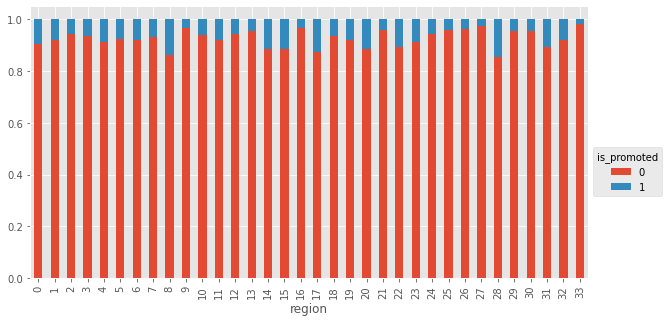

In [93]:
reg = pd.crosstab(train_data.region,train_data.is_promoted,normalize='index')
reg.plot.bar(stacked=True)
plt.legend(title='is_promoted',bbox_to_anchor=(1,0.5))

### Distribution of promotions among people with different Educational backgrounds


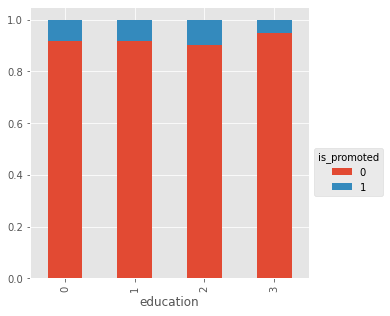

In [94]:
plt.rcParams['figure.figsize'] = [5, 5]
edu = pd.crosstab(train_data.education,train_data.is_promoted,normalize='index')
edu.plot.bar(stacked=True)
plt.rcParams['figure.figsize'] = [5, 5]
plt.legend(title='is_promoted',bbox_to_anchor=(1,0.5))

As we can see the percentages are pretty much the same aross different educational backgrounds.

### Variation of promotion percentage with recruitment channel that they have come from

In [95]:
pd.crosstab(test_data.recruitment_channel,train_data.is_promoted,normalize='index')

is_promoted,0,1
recruitment_channel,,
0,0.914284,0.085716
1,0.898004,0.101996
2,0.917579,0.082421


 According to the data, percentage of promotions is higher among the employees who got recruited through referrals.

### Variation of promotion percentage with respect to KPIs met or not

In [96]:
pd.crosstab(train_data['KPIs_met >80%'],train_data.is_promoted,normalize='index')

is_promoted,0,1
KPIs_met >80%,,
0,0.960413,0.039587
1,0.830906,0.169094


 Higher percentage of employees got promoted in the group of people whose KPIs_met is greater than 80%.

Let us check if there is any ratio difference across gender within the departments. For this I chose the top 3 highly populated departments.

 The model has a high accuracy but F1 score is less because of lesser Recall value. This means that number of False Negatives are higher which might have arised due to unbalanced classes. Oversampling or undersampling might increase F1 score.